data cleaning:

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    roc_curve,
)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')
for column in df.columns:
    print(f"Value counts in column '{column}':")
    print(df[column].value_counts())
    print('-' * 50)

Value counts in column 'General_Health':
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
--------------------------------------------------
Value counts in column 'Checkup':
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64
--------------------------------------------------
Value counts in column 'Exercise':
Yes    239381
No      69473
Name: Exercise, dtype: int64
--------------------------------------------------
Value counts in column 'Heart_Disease':
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
--------------------------------------------------
Value counts in column 'Skin_Cancer':
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64
--------------------------------------------------
Value counts in column 'Other_Cancer':
No    

In [12]:
df.dropna(inplace=True)

In [13]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [19]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})

In [20]:
categorical_cols = [
    'General_Health',
    'Checkup',
    'Exercise',
    'Skin_Cancer',
    'Other_Cancer',
    'Depression',
    'Diabetes',
    'Arthritis',
    'Smoking_History',
    'Sex',
    'Age_Category',
]
df[categorical_cols] = df[categorical_cols].astype(str)

In [21]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [9]:
X_train['is_train'] = 1
X_test['is_train'] = 0

combined_X = pd.concat([X_train, X_test], axis=0)

combined_X_encoded = pd.get_dummies(combined_X, columns=categorical_cols, drop_first=True)

X_train_encoded = combined_X_encoded[combined_X_encoded['is_train'] == 1].drop('is_train', axis=1)
X_test_encoded = combined_X_encoded[combined_X_encoded['is_train'] == 0].drop('is_train', axis=1)


In [10]:
combined_X_encoded

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,is_train,General_Health_Fair,General_Health_Good,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,185.0,77.11,22.43,8.0,30.0,4.0,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,168.0,73.48,26.15,30.0,20.0,24.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,175.0,88.45,28.80,28.0,16.0,30.0,4.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,160.0,103.42,40.39,0.0,30.0,12.0,4.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,165.0,58.97,21.63,0.0,60.0,8.0,2.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,173.0,106.59,35.73,0.0,3.0,10.0,2.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
12351,193.0,154.22,41.39,2.0,12.0,1.0,10.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12352,178.0,90.72,28.70,12.0,30.0,30.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12353,175.0,80.29,26.14,0.0,4.0,28.0,4.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
features_to_scale = [
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption',
]

scaler = StandardScaler()

X_train_encoded[features_to_scale] = scaler.fit_transform(X_train_encoded[features_to_scale])

X_test_encoded[features_to_scale] = scaler.transform(X_test_encoded[features_to_scale])


In [24]:
X_train_encoded = X_train_encoded.apply(pd.to_numeric)
X_test_encoded = X_test_encoded.apply(pd.to_numeric)


In [25]:
print("Data types of X_train_encoded columns:")
print(X_train_encoded.dtypes)
non_numeric_cols = X_train_encoded.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)


Data types of X_train_encoded columns:
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
General_Health_2                  uint8
General_Health_3                  uint8
General_Health_4                  uint8
General_Health_5                  uint8
Checkup_1                         uint8
Checkup_2                         uint8
Checkup_3                         uint8
Checkup_4                         uint8
Diabetes_1                        uint8
Diabetes_2                        uint8
Age_Category_10                   uint8
Age_Category_11                   uint8
Age_Category_12                   uint8
Age_Category_13                   uint8
Age_Category_2                    uint8
Age_Category_3                    uint8
Age_Category_4                    uint8
A

In [26]:
print("Missing values in X_train_encoded:", X_train_encoded.isnull().sum().sum())
print("Missing values in X_test_encoded:", X_test_encoded.isnull().sum().sum())


Missing values in X_train_encoded: 0
Missing values in X_test_encoded: 0


In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
)

df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')


df.dropna(inplace=True)

df['Heart_Disease'] = df['Heart_Disease'].str.strip().str.lower()
df['Heart_Disease'] = df['Heart_Disease'].map({'no': 0, 'yes': 1})
df = df[df['Heart_Disease'].notnull()]
df['Heart_Disease'] = df['Heart_Disease'].astype(int)


df_sampled = df.sample(frac=0.2, random_state=42).reset_index(drop=True)

categorical_cols = [
    'General_Health',
    'Checkup',
    'Exercise',
    'Skin_Cancer',
    'Other_Cancer',
    'Depression',
    'Diabetes',
    'Arthritis',
    'Smoking_History',
    'Sex',
    'Age_Category',
]

df_sampled[categorical_cols] = df_sampled[categorical_cols].astype(str)

X = df_sampled.drop('Heart_Disease', axis=1)
y = df_sampled['Heart_Disease']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

features_to_scale = [
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption',
]

scaler = StandardScaler()

X_train_encoded[features_to_scale] = scaler.fit_transform(X_train_encoded[features_to_scale])
X_test_encoded[features_to_scale] = scaler.transform(X_test_encoded[features_to_scale])

X_train_encoded = X_train_encoded.apply(pd.to_numeric)
X_test_encoded = X_test_encoded.apply(pd.to_numeric)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)


lasso_model = LogisticRegression(
    penalty='l1', solver='saga', max_iter=1000, random_state=42, n_jobs=-1
)


lasso_model.fit(X_train_encoded, y_train)

lasso_pred = lasso_model.predict(X_test_encoded)

lasso_accuracy = accuracy_score(y_test, lasso_pred)
lasso_precision = precision_score(y_test, lasso_pred)
lasso_recall = recall_score(y_test, lasso_pred)
lasso_f1 = f1_score(y_test, lasso_pred)
lasso_roc_auc = roc_auc_score(y_test, lasso_model.decision_function(X_test_encoded))

print("=== LASSO Logistic Regression Model Evaluation ===")
print("Accuracy:", lasso_accuracy)
print("Precision:", lasso_precision)
print("Recall:", lasso_recall)
print("F1 Score:", lasso_f1)
print("ROC-AUC Score:", lasso_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, lasso_pred))

sgd_svm = SGDClassifier(
    loss='hinge', penalty='l2', max_iter=1000, random_state=42, n_jobs=-1
)

sgd_svm.fit(X_train_encoded, y_train)

sgd_svm_pred = sgd_svm.predict(X_test_encoded)

sgd_svm_accuracy = accuracy_score(y_test, sgd_svm_pred)
sgd_svm_precision = precision_score(y_test, sgd_svm_pred)
sgd_svm_recall = recall_score(y_test, sgd_svm_pred)
sgd_svm_f1 = f1_score(y_test, sgd_svm_pred)
sgd_svm_roc_auc = roc_auc_score(y_test, sgd_svm.decision_function(X_test_encoded))

print("=== SGD Classifier (SVM Approximation) Model Evaluation ===")
print("Accuracy:", sgd_svm_accuracy)
print("Precision:", sgd_svm_precision)
print("Recall:", sgd_svm_recall)
print("F1 Score:", sgd_svm_f1)
print("ROC-AUC Score:", sgd_svm_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, sgd_svm_pred))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train_encoded, y_train)
rf_pred = rf_model.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_encoded)[:, 1])

print("=== Random Forest Model Evaluation ===")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC-AUC Score:", rf_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Shape of X_train_encoded: (49416, 37)
Shape of X_test_encoded: (12355, 37)
=== LASSO Logistic Regression Model Evaluation ===
Accuracy: 0.9176042088223392
Precision: 0.4263565891472868
Recall: 0.055055055055055056
F1 Score: 0.0975177304964539
ROC-AUC Score: 0.8333440873067502

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     11356
           1       0.43      0.06      0.10       999

    accuracy                           0.92     12355
   macro avg       0.67      0.52      0.53     12355
weighted avg       0.88      0.92      0.89     12355

=== SGD Classifier (SVM Approximation) Model Evaluation ===
Accuracy: 0.9191420477539458
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.778106038408962

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     11356
           1       0.00      0.00      0.00       999

    accuracy       

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/s

=== Random Forest Model Evaluation ===
Accuracy: 0.9173613921489275
Precision: 0.36904761904761907
Recall: 0.031031031031031032
F1 Score: 0.057248384118190214
ROC-AUC Score: 0.798420073825146

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     11356
           1       0.37      0.03      0.06       999

    accuracy                           0.92     12355
   macro avg       0.65      0.51      0.51     12355
weighted avg       0.88      0.92      0.88     12355



In [5]:
len(y == '0'),len(y =='1')

(30885, 30885)

In [13]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 9.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


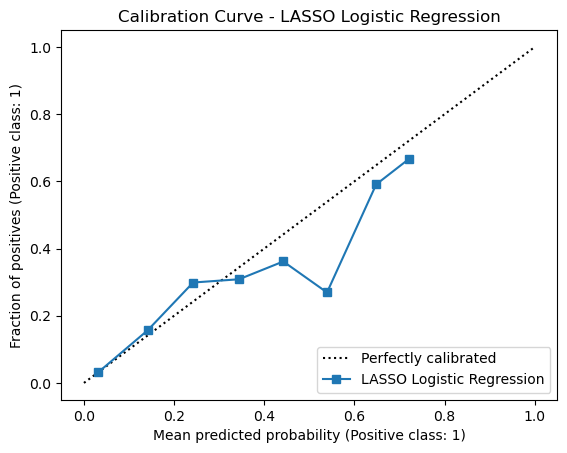

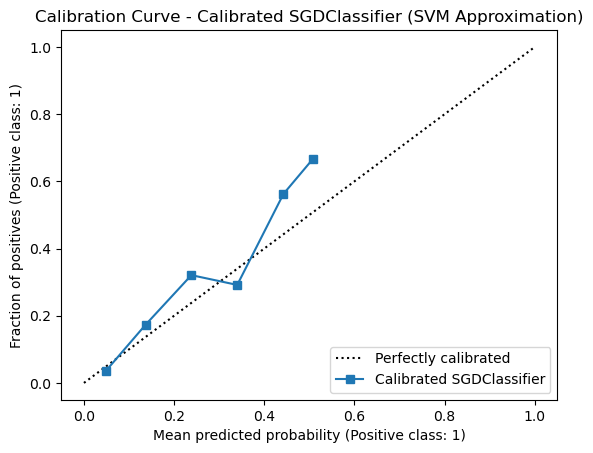

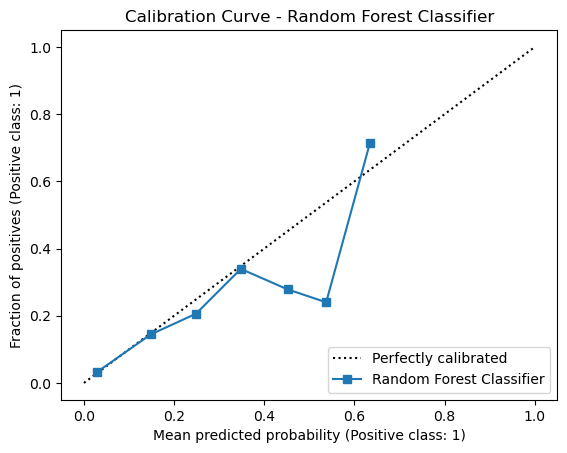

In [5]:
CalibrationDisplay.from_estimator(
    lasso_model, X_test_encoded, y_test, n_bins=10, name='LASSO Logistic Regression'
)
plt.title('Calibration Curve - LASSO Logistic Regression')
plt.show()

sgd_svm_calibrated = CalibratedClassifierCV(sgd_svm, cv=5)
sgd_svm_calibrated.fit(X_train_encoded, y_train)

CalibrationDisplay.from_estimator(
    sgd_svm_calibrated, X_test_encoded, y_test, n_bins=10, name='Calibrated SGDClassifier'
)
plt.title('Calibration Curve - Calibrated SGDClassifier (SVM Approximation)')
plt.show()

CalibrationDisplay.from_estimator(
    rf_model, X_test_encoded, y_test, n_bins=10, name='Random Forest Classifier'
)
plt.title('Calibration Curve - Random Forest Classifier')
plt.show()

In [3]:
df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')
for column in df.columns:
    print(f"Value counts in column '{column}':")
    print(df[column].value_counts())
    print('-' * 50)

Value counts in column 'General_Health':
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
--------------------------------------------------
Value counts in column 'Checkup':
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64
--------------------------------------------------
Value counts in column 'Exercise':
Yes    239381
No      69473
Name: Exercise, dtype: int64
--------------------------------------------------
Value counts in column 'Heart_Disease':
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
--------------------------------------------------
Value counts in column 'Skin_Cancer':
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64
--------------------------------------------------
Value counts in column 'Other_Cancer':
No    

In [4]:
import pandas as pd

df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')
for column in df.columns:
    print(f"Value counts in column '{column}':")
    print(df[column].value_counts())
    print('-' * 50)

categorical_cols = [
    'General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History'
]

for col in categorical_cols:
    print(f"Value counts in column '{col}':")
    print(df[col].value_counts())
    print("-" * 50)


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nColumns after one-hot encoding:")
print(df_encoded.columns.tolist())

if df_encoded.columns.duplicated().any():
    print("Duplicate columns found, removing duplicates...")
    df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]
    print("Duplicates removed.")


df_encoded['Heart_Disease'] = df_encoded['Heart_Disease'].map({'No': 0, 'Yes': 1})

print("\nChecking for missing values in the dataset:")
print(df_encoded.isna().sum())

df_encoded = df_encoded.dropna().reset_index(drop=True)

print("\nUnique values in 'Heart_Disease':", df_encoded['Heart_Disease'].unique())

print("\nFinal shape of the dataset:", df_encoded.shape)
print("Final columns in the dataset:", df_encoded.columns.tolist())


Value counts in column 'General_Health':
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
--------------------------------------------------
Value counts in column 'Checkup':
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64
--------------------------------------------------
Value counts in column 'Exercise':
Yes    239381
No      69473
Name: Exercise, dtype: int64
--------------------------------------------------
Value counts in column 'Heart_Disease':
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
--------------------------------------------------
Value counts in column 'Skin_Cancer':
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64
--------------------------------------------------
Value counts in column 'Other_Cancer':
No    

In [5]:
import pandas as pd
from itertools import combinations

selected_features = [
    'Exercise_Yes',                
    'Fruit_Consumption',           
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption',
    'BMI',                         
    'Smoking_History_Yes',         
    'Alcohol_Consumption',         
    'Age_Category_80+',           
    'Age_Category_75-79',
    'Age_Category_70-74',
    'Sex_Male',                   
    'Depression_Yes',           
    'Diabetes_Yes',            
    'Arthritis_Yes',       
    'General_Health_Good',     
    'General_Health_Fair',
    'General_Health_Poor'
]

missing_features = [feat for feat in selected_features if feat not in df_encoded.columns]
if missing_features:
    raise ValueError(f"Missing features in dataset: {missing_features}")
print("All selected features found in the dataset.")

feature_combos = list(combinations(selected_features, 2))

interaction_data = pd.DataFrame()

print(f"Creating {len(feature_combos)} pairwise interaction terms...")
for f1, f2 in feature_combos:
    interaction_name = f"{f1}*{f2}"
    interaction_data[interaction_name] = df_encoded[f1] * df_encoded[f2]


df_interactive = pd.concat([df_encoded, interaction_data], axis=1)

print("\nFinal dataset shape after adding interaction terms:", df_interactive.shape)
print(f"Number of interaction terms created: {interaction_data.shape[1]}")
print("Sample of interaction terms:")
print(interaction_data.head())

print("\nChecking for NaN or infinite values in the final dataset:")
print(df_interactive.isin([np.nan, np.inf, -np.inf]).sum().sum())

print("\nFinal columns in the dataset:")
print(df_interactive.columns.tolist())


All selected features found in the dataset.
Creating 136 pairwise interaction terms...

Final dataset shape after adding interaction terms: (308854, 174)
Number of interaction terms created: 136
Sample of interaction terms:
   Exercise_Yes*Fruit_Consumption  Exercise_Yes*Green_Vegetables_Consumption  \
0                             0.0                                        0.0   
1                             0.0                                        0.0   
2                            12.0                                        3.0   
3                            30.0                                       30.0   
4                             0.0                                        0.0   

   Exercise_Yes*FriedPotato_Consumption  Exercise_Yes*BMI  \
0                                   0.0              0.00   
1                                   0.0              0.00   
2                                  16.0             33.47   
3                                   8.0            

/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1544334981.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_data[interaction_name] = df_encoded[f1] * df_encoded[f2]
/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1544334981.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_data[interaction_name] = df_encoded[f1] * df_encoded[f2]
/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1544334981.py:47: PerformanceWarning: DataFrame is highly fragmented.  Th

0

Final columns in the dataset:
['Heart_Disease', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'General_Health_Very Good', 'Checkup_Never', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year', 'Exercise_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes', 'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Smoking_History_Yes', 'Exercise_Yes*Fruit_Consumption', 'Exercise_Yes*Green_Vegetables_Consumption', 'Exe

In [6]:
import pandas as pd
import numpy as np
from itertools import combinations

selected_features = [
    'Exercise_Yes',                
    'Fruit_Consumption',           
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption',
    'BMI',                         
    'Smoking_History_Yes',        
    'Alcohol_Consumption',         
    'Age_Category_80+',         
    'Age_Category_75-79',
    'Age_Category_70-74',
    'Sex_Male',                    
    'Depression_Yes',             
    'Diabetes_Yes',             
    'Arthritis_Yes',             
    'General_Health_Good',       
    'General_Health_Fair',
    'General_Health_Poor'
]

missing_features = [feat for feat in selected_features if feat not in df_encoded.columns]
if missing_features:
    raise ValueError(f"Missing features in dataset: {missing_features}")
print("All selected features found in the dataset.")


print("Generating pairwise interaction terms efficiently...")

feature_combos = list(combinations(selected_features, 2))

interaction_data = {
    f"{f1}*{f2}": df_encoded[f1].values * df_encoded[f2].values for f1, f2 in feature_combos
}

interaction_df = pd.DataFrame(interaction_data)


df_final = pd.concat([df_encoded, interaction_df], axis=1)

print(f"\nFinal dataset shape after adding {len(interaction_df.columns)} interaction terms: {df_final.shape}")
print(f"Number of interaction terms added: {len(interaction_df.columns)}")

if df_final.isin([np.nan, np.inf, -np.inf]).values.any():
    print("Warning: The dataset contains NaN or infinite values.")
else:
    print("No NaN or infinite values found in the dataset.")

print("\nSample interaction terms:")
print(interaction_df.head())


All selected features found in the dataset.
Generating pairwise interaction terms efficiently...

Final dataset shape after adding 136 interaction terms: (308854, 174)
Number of interaction terms added: 136
No NaN or infinite values found in the dataset.

Sample interaction terms:
   Exercise_Yes*Fruit_Consumption  Exercise_Yes*Green_Vegetables_Consumption  \
0                             0.0                                        0.0   
1                             0.0                                        0.0   
2                            12.0                                        3.0   
3                            30.0                                       30.0   
4                             0.0                                        0.0   

   Exercise_Yes*FriedPotato_Consumption  Exercise_Yes*BMI  \
0                                   0.0              0.00   
1                                   0.0              0.00   
2                                  16.0             33

Top 5 interaction terms most correlated with Heart_Disease:
BMI*Diabetes_Yes                    0.172032
Sex_Male*Diabetes_Yes               0.167481
Smoking_History_Yes*Diabetes_Yes    0.166914
Diabetes_Yes*Arthritis_Yes          0.165356
BMI*General_Health_Poor             0.161545
Name: Heart_Disease, dtype: float64


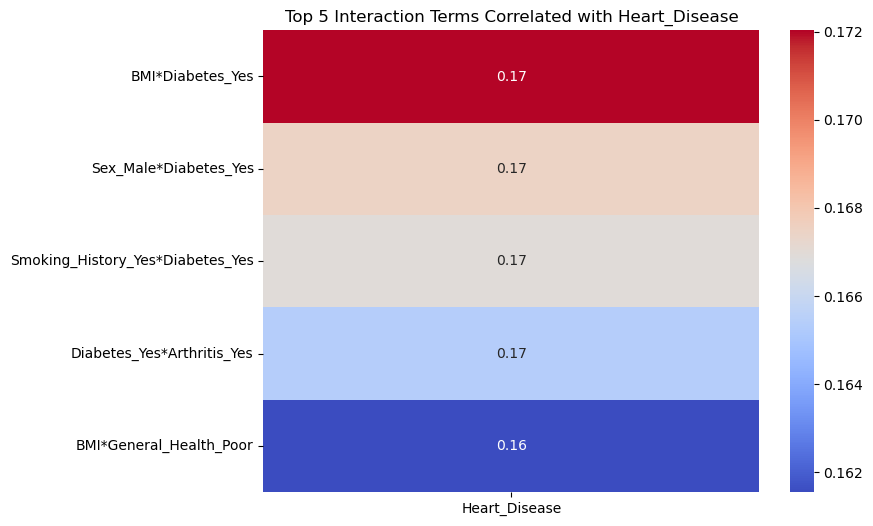

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df_final.corr()


heart_corr = corr_matrix['Heart_Disease'].sort_values(ascending=False)


interaction_corr = heart_corr.filter(like="*").head(5)


print("Top 5 interaction terms most correlated with Heart_Disease:")
print(interaction_corr)


plt.figure(figsize=(8, 6))
sns.heatmap(interaction_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top 5 Interaction Terms Correlated with Heart_Disease")
plt.show()


Grouped Variable Pairs with Average Correlation to Heart_Disease:
         Variable_Pair  Average_Correlation
0         BMI*Diabetes             0.172032
1         Diabetes*Sex             0.167481
2     Diabetes*Smoking             0.166914
3   Arthritis*Diabetes             0.165356
6        Arthritis*BMI             0.151945
..                 ...                  ...
75      Exercise*Green            -0.054132
76      Exercise*Fruit            -0.057340
77        BMI*Exercise            -0.075239
78             Age*Age                  NaN
79     General*General                  NaN

[80 rows x 2 columns]

All Interaction Terms with Correlation to Heart_Disease:
                            Interaction_Term  Correlation
0                           BMI*Diabetes_Yes     0.172032
1                      Sex_Male*Diabetes_Yes     0.167481
2           Smoking_History_Yes*Diabetes_Yes     0.166914
3                 Diabetes_Yes*Arthritis_Yes     0.165356
4                    BMI*General_He

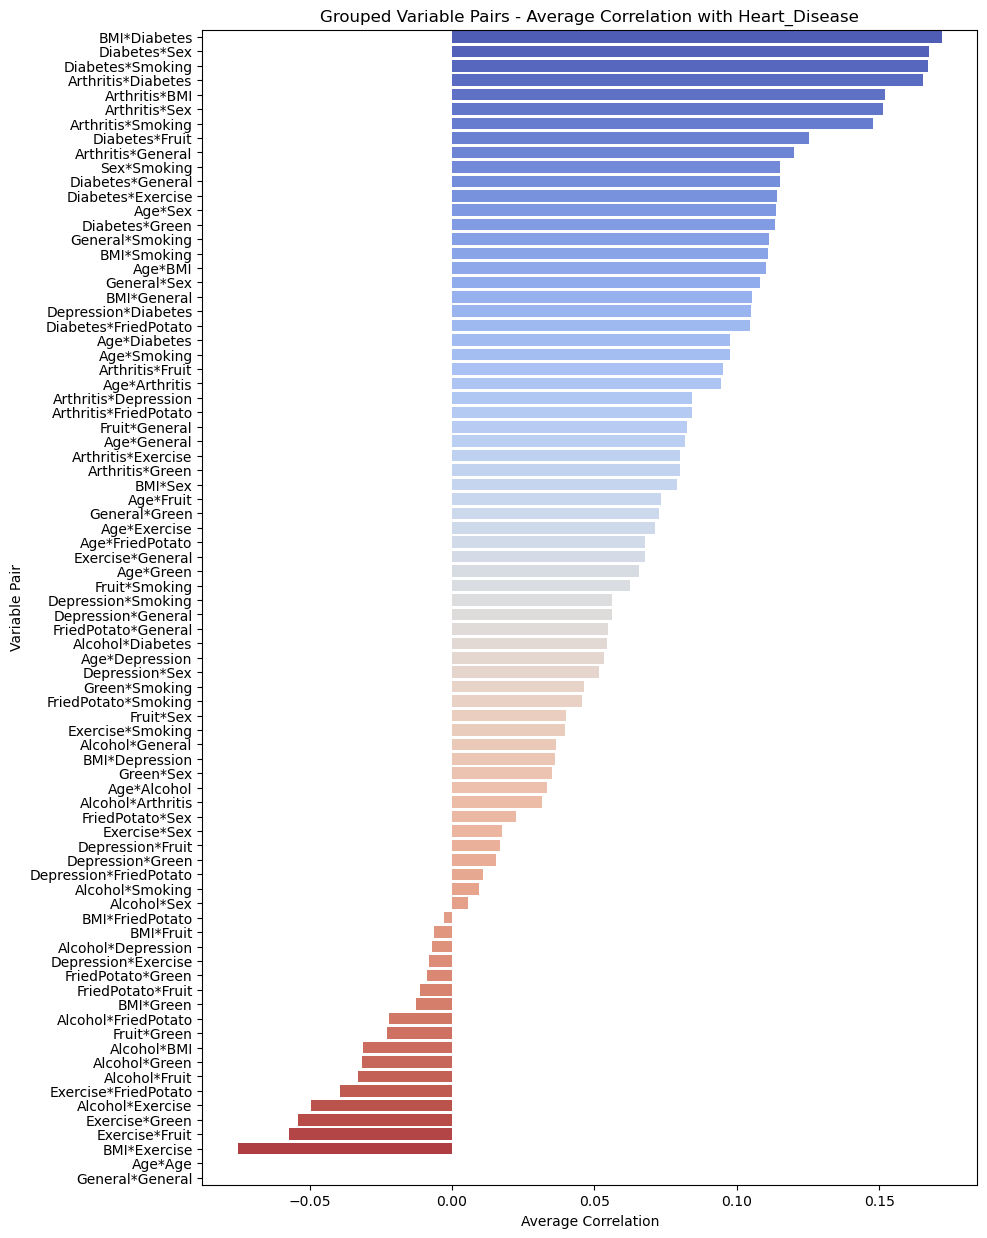

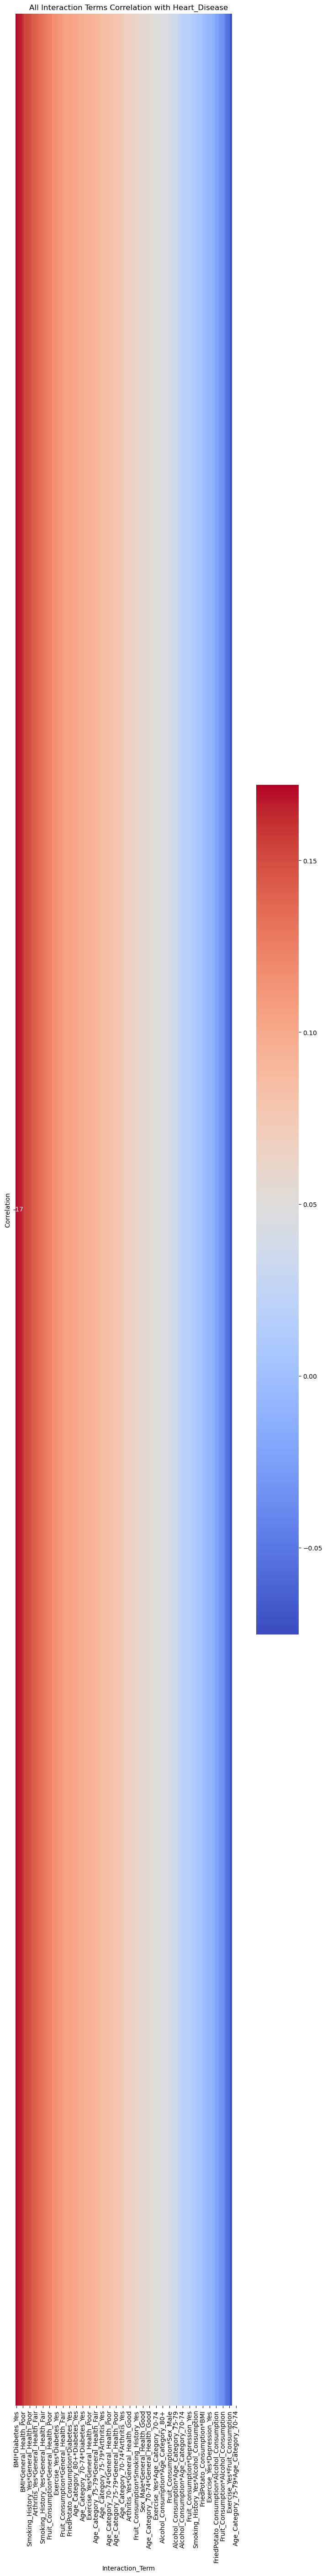

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df_final.corr()


heart_corr = corr_matrix['Heart_Disease'].drop('Heart_Disease').sort_values(ascending=False)


interaction_corr = heart_corr[heart_corr.index.str.contains(r'\*')]


interaction_groups = {}

for term, corr_value in interaction_corr.items():

    base_term = '*'.join(sorted([part.split('_')[0] for part in term.split('*')]))
    

    if base_term not in interaction_groups:
        interaction_groups[base_term] = []
    interaction_groups[base_term].append(corr_value)


average_corr = {k: sum(v) / len(v) for k, v in interaction_groups.items()}


grouped_corr_df = pd.DataFrame({
    'Variable_Pair': average_corr.keys(),
    'Average_Correlation': average_corr.values()
}).sort_values(by='Average_Correlation', ascending=False)


all_interactions_df = pd.DataFrame({
    'Interaction_Term': interaction_corr.index,
    'Correlation': interaction_corr.values
}).sort_values(by='Correlation', ascending=False)


print("Grouped Variable Pairs with Average Correlation to Heart_Disease:")
print(grouped_corr_df)


print("\nAll Interaction Terms with Correlation to Heart_Disease:")
print(all_interactions_df)


plt.figure(figsize=(10, 15))
sns.barplot(y='Variable_Pair', x='Average_Correlation', data=grouped_corr_df, palette='coolwarm')
plt.title("Grouped Variable Pairs - Average Correlation with Heart_Disease")
plt.xlabel("Average Correlation")
plt.ylabel("Variable Pair")
plt.show()


plt.figure(figsize=(8, len(all_interactions_df) // 2))
sns.heatmap(all_interactions_df.set_index('Interaction_Term').T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("All Interaction Terms Correlation with Heart_Disease")
plt.show()


In [20]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


from itertools import combinations
import pandas as pd


df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')


In [21]:
le = LabelEncoder()

df['Heart_Disease_Encoded'] = le.fit_transform(df['Heart_Disease'])

print(df[['Heart_Disease', 'Heart_Disease_Encoded']].drop_duplicates())


  Heart_Disease  Heart_Disease_Encoded
0            No                      0
1           Yes                      1


In [22]:
binary_cols = ['Exercise', 'Arthritis', 'Smoking_History']

for col in binary_cols:
    df[col + '_Encoded'] = df[col].map({'Yes': 1, 'No': 0})
    

print(df[binary_cols + [col + '_Encoded' for col in binary_cols]].head())


  Exercise Arthritis Smoking_History  Exercise_Encoded  Arthritis_Encoded  \
0       No       Yes             Yes                 0                  1   
1       No        No              No                 0                  0   
2      Yes        No              No                 1                  0   
3      Yes        No              No                 1                  0   
4       No        No             Yes                 0                  0   

   Smoking_History_Encoded  
0                        1  
1                        0  
2                        0  
3                        0  
4                        1  


In [23]:
df['Diabetes_Encoded'] = df['Diabetes'].apply(lambda x: 0 if 'No' in x else 1)

print(df[['Diabetes', 'Diabetes_Encoded']].drop_duplicates())


                                       Diabetes  Diabetes_Encoded
0                                            No                 0
1                                           Yes                 1
26      No, pre-diabetes or borderline diabetes                 0
100  Yes, but female told only during pregnancy                 1


In [24]:
def age_midpoint(age_range):
    if '+' in age_range:
        return 85  
    else:
        start, end = age_range.split('-')
        return (int(start) + int(end)) / 2

df['Age_Numeric'] = df['Age_Category'].apply(age_midpoint)

print(df[['Age_Category', 'Age_Numeric']].drop_duplicates())


    Age_Category  Age_Numeric
0          70-74         72.0
2          60-64         62.0
3          75-79         77.0
4            80+         85.0
7          65-69         67.0
12         50-54         52.0
18         45-49         47.0
20         18-24         21.0
22         30-34         32.0
23         55-59         57.0
76         35-39         37.0
272        40-44         42.0
377        25-29         27.0


In [25]:
df['Sex_Encoded'] = df['Sex'].map({'Male': 1, 'Female': 0})

print(df[['Sex', 'Sex_Encoded']].drop_duplicates())


      Sex  Sex_Encoded
0  Female            0
3    Male            1


In [26]:
y = df['Heart_Disease_Encoded']

X = df[['Exercise_Encoded', 'Diabetes_Encoded', 'Arthritis_Encoded', 
        'Age_Numeric', 'Smoking_History_Encoded']]


In [27]:
required_columns = ['BMI', 'Fruit_Consumption', 'Alcohol_Consumption', 'Sex_Encoded', 
                    'Exercise_Encoded', 'Diabetes_Encoded', 'Smoking_History_Encoded']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")


All required columns are present.


In [28]:
X['BMI_Exercise'] = df['BMI'] * df['Exercise_Encoded']
X['Exercise_Fruit_Consumption'] = df['Exercise_Encoded'] * df['Fruit_Consumption']
X['Alcohol_Exercise'] = df['Alcohol_Consumption'] * df['Exercise_Encoded']
X['BMI_Diabetes'] = df['BMI'] * df['Diabetes_Encoded']
X['Diabetes_Sex'] = df['Diabetes_Encoded'] * df['Sex_Encoded']
X['Diabetes_Smoking_History'] = df['Diabetes_Encoded'] * df['Smoking_History_Encoded']

print(X[['BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise', 
        'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History']].head())


   BMI_Exercise  Exercise_Fruit_Consumption  Alcohol_Exercise  BMI_Diabetes  \
0          0.00                         0.0               0.0          0.00   
1          0.00                         0.0               0.0         28.29   
2         33.47                        12.0               4.0         33.47   
3         28.73                        30.0               0.0         28.73   
4          0.00                         0.0               0.0          0.00   

   Diabetes_Sex  Diabetes_Smoking_History  
0             0                         0  
1             0                         0  
2             0                         0  
3             1                         0  
4             0                         0  


/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1035242365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI_Exercise'] = df['BMI'] * df['Exercise_Encoded']
/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1035242365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Exercise_Fruit_Consumption'] = df['Exercise_Encoded'] * df['Fruit_Consumption']
/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/1035242365.py:4: SettingWithCopyWarning: 
A value is 

In [29]:
final_features = X.copy()

final_features = pd.concat([
    X[['Exercise_Encoded', 'Diabetes_Encoded', 'Arthritis_Encoded', 
       'Age_Numeric', 'Smoking_History_Encoded']],
    X[['BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise', 
       'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History']]
], axis=1)



print(final_features.head())


   Exercise_Encoded  Diabetes_Encoded  Arthritis_Encoded  Age_Numeric  \
0                 0                 0                  1         72.0   
1                 0                 1                  0         72.0   
2                 1                 1                  0         62.0   
3                 1                 1                  0         77.0   
4                 0                 0                  0         85.0   

   Smoking_History_Encoded  BMI_Exercise  Exercise_Fruit_Consumption  \
0                        1          0.00                         0.0   
1                        0          0.00                         0.0   
2                        0         33.47                        12.0   
3                        0         28.73                        30.0   
4                        1          0.00                         0.0   

   Alcohol_Exercise  BMI_Diabetes  Diabetes_Sex  Diabetes_Smoking_History  
0               0.0          0.00             0     

In [31]:
print(df.columns)


Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Heart_Disease_Encoded', 'Exercise_Encoded', 'Arthritis_Encoded',
       'Smoking_History_Encoded', 'Diabetes_Encoded', 'Age_Numeric',
       'Sex_Encoded'],
      dtype='object')


In [32]:
interaction_columns = ['BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise', 
                       'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History']

for col in interaction_columns:
    df[col] = X[col]

print(df[['BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise', 
         'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History']].head())


   BMI_Exercise  Exercise_Fruit_Consumption  Alcohol_Exercise  BMI_Diabetes  \
0          0.00                         0.0               0.0          0.00   
1          0.00                         0.0               0.0         28.29   
2         33.47                        12.0               4.0         33.47   
3         28.73                        30.0               0.0         28.73   
4          0.00                         0.0               0.0          0.00   

   Diabetes_Sex  Diabetes_Smoking_History  
0             0                         0  
1             0                         0  
2             0                         0  
3             1                         0  
4             0                         0  


In [33]:
required_columns = [
    'Exercise_Encoded', 'Diabetes_Encoded', 'Arthritis_Encoded', 'Age_Numeric',
    'Smoking_History_Encoded', 'BMI', 'Fruit_Consumption', 'Alcohol_Consumption',
    'Sex_Encoded', 'BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise',
    'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History',
    'Heart_Disease_Encoded'
]


In [34]:
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print("Missing Columns:")
    for col in missing_columns:
        print(col)
else:
    print("All required columns are present.")


All required columns are present.


In [35]:
y = df['Heart_Disease_Encoded']

feature_columns = [
    'Exercise_Encoded', 'Diabetes_Encoded', 'Arthritis_Encoded', 'Age_Numeric',
    'Smoking_History_Encoded', 'BMI', 'Fruit_Consumption', 'Alcohol_Consumption',
    'Sex_Encoded', 'BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise',
    'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History'
]

X = df[feature_columns]


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['BMI', 'Fruit_Consumption', 'Alcohol_Consumption', 'Age_Numeric',
                  'BMI_Exercise', 'Exercise_Fruit_Consumption', 'Alcohol_Exercise', 
                  'BMI_Diabetes', 'Diabetes_Sex', 'Diabetes_Smoking_History']

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nScaled numerical features:")
print(X[numerical_cols].head())



Scaled numerical features:
        BMI  Fruit_Consumption  Alcohol_Consumption  Age_Numeric  \
0 -2.159696           0.006625            -0.621527     0.949446   
1 -0.051548           0.006625            -0.621527     0.949446   
2  0.742649          -0.716973            -0.133707     0.396308   
3  0.015913           0.006625            -0.621527     1.226015   
4 -0.652562          -0.877772            -0.621527     1.668525   

   BMI_Exercise  Exercise_Fruit_Consumption  Alcohol_Exercise  BMI_Diabetes  \
0     -1.690794                   -0.951911         -0.557089     -0.389350   
1     -1.690794                   -0.951911         -0.557089      2.103379   
2      0.909541                   -0.486521         -0.035850      2.559807   
3      0.541284                    0.211563         -0.557089      2.142149   
4     -1.690794                   -0.951911         -0.557089     -0.389350   

   Diabetes_Sex  Diabetes_Smoking_History  
0     -0.267079                 -0.264733  


/var/folders/53/4xcf3x6s0kj0lhwzjwsvmv0m0000gn/T/ipykernel_83363/3926763875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [39]:
print(df.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Heart_Disease_Encoded', 'Exercise_Encoded', 'Arthritis_Encoded',
       'Smoking_History_Encoded', 'Diabetes_Encoded', 'Age_Numeric',
       'Sex_Encoded', 'BMI_Exercise', 'Exercise_Fruit_Consumption',
       'Alcohol_Exercise', 'BMI_Diabetes', 'Diabetes_Sex',
       'Diabetes_Smoking_History'],
      dtype='object')


In [44]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [47]:
df = pd.read_csv('/Users/Sam_1/Downloads/CVD_cleaned.csv')


In [51]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [54]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_columns = [
    'General_Health',
    'Checkup',
    'Exercise',
    'Heart_Disease',
    'Skin_Cancer',
    'Other_Cancer',
    'Depression',
    'Diabetes',
    'Arthritis',
    'Sex',
    'Age_Category',
    'Smoking_History'
]


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[categorical_columns])

feature_names = encoder.get_feature_names_out(categorical_columns)

encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

numeric_columns = [
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption'
]

final_df = pd.concat([encoded_df, df[numeric_columns]], axis=1)

print("Original shape:", df.shape)
print("New shape after one-hot encoding:", final_df.shape)

print("\nFirst few columns of encoded dataset:")
print(final_df.head())

Original shape: (308854, 19)
New shape after one-hot encoding: (308854, 50)

First few columns of encoded dataset:
   General_Health_Excellent  General_Health_Fair  General_Health_Good  \
0                       0.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  1.0   

   General_Health_Poor  General_Health_Very Good  Checkup_5 or more years ago  \
0                  1.0                       0.0                          0.0   
1                  0.0                       1.0                          0.0   
2                  0.0                       1.0                          0.0   
3                  1.0                       0.0                          0.0   
4                  0.0                   

In [55]:
exercise_col = [col for col in final_df.columns if col.startswith('Exercise_')]
diabetes_cols = [col for col in final_df.columns if col.startswith('Diabetes_')]
sex_cols = [col for col in final_df.columns if col.startswith('Sex_')]
smoking_cols = [col for col in final_df.columns if col.startswith('Smoking_History_')]

for ex_col in exercise_col:
    final_df[f'BMI_{ex_col}'] = final_df['BMI'] * final_df[ex_col]

for ex_col in exercise_col:
    final_df[f'Fruit_Consumption_{ex_col}'] = final_df['Fruit_Consumption'] * final_df[ex_col]


for ex_col in exercise_col:
    final_df[f'Alcohol_Consumption_{ex_col}'] = final_df['Alcohol_Consumption'] * final_df[ex_col]

for diabetes_col in diabetes_cols:
    final_df[f'BMI_{diabetes_col}'] = final_df['BMI'] * final_df[diabetes_col]

for diabetes_col in diabetes_cols:
    for sex_col in sex_cols:
        final_df[f'{diabetes_col}_{sex_col}'] = final_df[diabetes_col] * final_df[sex_col]

for diabetes_col in diabetes_cols:
    for smoking_col in smoking_cols:
        final_df[f'{diabetes_col}_{smoking_col}'] = final_df[diabetes_col] * final_df[smoking_col]

print("Original number of columns:", len(encoded_df.columns))
print("Number of columns after adding interactions:", len(final_df.columns))
print("\nNew interaction columns:")
interaction_cols = [col for col in final_df.columns if '_' in col and col not in encoded_df.columns]
print("\n".join(interaction_cols))

Original number of columns: 43
Number of columns after adding interactions: 76

New interaction columns:
Height_(cm)
Weight_(kg)
Alcohol_Consumption
Fruit_Consumption
Green_Vegetables_Consumption
FriedPotato_Consumption
BMI_Exercise_No
BMI_Exercise_Yes
Fruit_Consumption_Exercise_No
Fruit_Consumption_Exercise_Yes
Alcohol_Consumption_Exercise_No
Alcohol_Consumption_Exercise_Yes
BMI_Diabetes_No
BMI_Diabetes_No, pre-diabetes or borderline diabetes
BMI_Diabetes_Yes
BMI_Diabetes_Yes, but female told only during pregnancy
Diabetes_No_Sex_Female
Diabetes_No_Sex_Male
Diabetes_No, pre-diabetes or borderline diabetes_Sex_Female
Diabetes_No, pre-diabetes or borderline diabetes_Sex_Male
Diabetes_Yes_Sex_Female
Diabetes_Yes_Sex_Male
Diabetes_Yes, but female told only during pregnancy_Sex_Female
Diabetes_Yes, but female told only during pregnancy_Sex_Male
Diabetes_No_Smoking_History_No
Diabetes_No_Smoking_History_Yes
Diabetes_No, pre-diabetes or borderline diabetes_Smoking_History_No
Diabetes_No, pre

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

basic_features = [col for col in final_df.columns if any(x in col for x in [
    'Exercise_',
    'Diabetes_',
    'Arthritis_',
    'Age_Category_',
    'Smoking_History_'
])]

interaction_features = [col for col in final_df.columns if any(x in col for x in [
    'BMI_Exercise',
    'Fruit_Consumption_Exercise',
    'Alcohol_Consumption_Exercise',
    'BMI_Diabetes',
    'Diabetes_Sex',
    'Diabetes_Smoking_History'
])]


y = final_df['Heart_Disease_Yes'].values

_, X_subset, _, y_subset = train_test_split(final_df, y, test_size=0.2, random_state=42)

X1 = X_subset[basic_features]  
X2 = X_subset[basic_features + interaction_features]  

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_subset, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_subset, test_size=0.2, random_state=42)

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


smote = SMOTE(random_state=42)
X1_train_balanced, y1_train_balanced = smote.fit_resample(X1_train_scaled, y1_train)
X2_train_balanced, y2_train_balanced = smote.fit_resample(X2_train_scaled, y2_train)


print("Training Model 1 (Basic Features)")
svm1 = SVC(kernel='rbf', random_state=42)
svm1.fit(X1_train_balanced, y1_train_balanced)
y1_pred = svm1.predict(X1_test_scaled)

print("\nModel 1 Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))


print("\nTraining Model 2 (Basic + Interaction Features)")
svm2 = SVC(kernel='rbf', random_state=42)
svm2.fit(X2_train_balanced, y2_train_balanced)
y2_pred = svm2.predict(X2_test_scaled)

print("\nModel 2 Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.uti

Training Model 1 (Basic Features)

Model 1 Results:

Confusion Matrix:
[[8028 3302]
 [ 257  768]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     11330
         1.0       0.19      0.75      0.30      1025

    accuracy                           0.71     12355
   macro avg       0.58      0.73      0.56     12355
weighted avg       0.90      0.71      0.78     12355


Training Model 2 (Basic + Interaction Features)

Model 2 Results:

Confusion Matrix:
[[7996 3334]
 [ 257  768]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     11330
         1.0       0.19      0.75      0.30      1025

    accuracy                           0.71     12355
   macro avg       0.58      0.73      0.56     12355
weighted avg       0.90      0.71      0.77     12355



In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy1 = accuracy_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)

accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)

import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Model 1 (Basic Features)': [accuracy1, precision1, recall1],
    'Model 2 (Basic + Interactions)': [accuracy2, precision2, recall2]
})


metrics_df['Model 1 (Basic Features)'] = metrics_df['Model 1 (Basic Features)'].map('{:.2%}'.format)
metrics_df['Model 2 (Basic + Interactions)'] = metrics_df['Model 2 (Basic + Interactions)'].map('{:.2%}'.format)


metrics_df['Absolute Difference'] = [
    f"{abs(float(str(metrics_df.iloc[i,1]).rstrip('%')) - float(str(metrics_df.iloc[i,2]).rstrip('%'))):.2f}%" 
    for i in range(3)
]

print("\nModel Performance Comparison:")
print(metrics_df.to_string(index=False))

print("\nInterpretation:")
print("1. Accuracy: Percentage of all predictions that were correct")
print("2. Precision: Percentage of predicted heart disease cases that were actually heart disease")
print("3. Recall: Percentage of actual heart disease cases that were correctly identified")


Model Performance Comparison:
   Metric Model 1 (Basic Features) Model 2 (Basic + Interactions) Absolute Difference
 Accuracy                   71.19%                         70.93%               0.26%
Precision                   18.87%                         18.72%               0.15%
   Recall                   74.93%                         74.93%               0.00%

Interpretation:
1. Accuracy: Percentage of all predictions that were correct
2. Precision: Percentage of predicted heart disease cases that were actually heart disease
3. Recall: Percentage of actual heart disease cases that were correctly identified


In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

basic_features = [col for col in final_df.columns if any(x in col for x in [
    'Exercise_',
    'Diabetes_',
    'Arthritis_',
    'Age_Category_',
    'Smoking_History_'
])]

interaction_features = [col for col in final_df.columns if any(x in col for x in [
    'BMI_Exercise',
    'Fruit_Consumption_Exercise',
    'Alcohol_Consumption_Exercise',
    'BMI_Diabetes',
    'Diabetes_Sex',
    'Diabetes_Smoking_History'
])]

y = final_df['Heart_Disease_Yes'].values

_, X_subset, _, y_subset = train_test_split(final_df, y, test_size=0.2, random_state=42)

X1 = X_subset[basic_features]  
X2 = X_subset[basic_features + interaction_features]  


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_subset, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_subset, test_size=0.2, random_state=42)

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


print("Training Model 1 (Basic Features)")
svm1 = SVC(kernel='rbf', random_state=42)
svm1.fit(X1_train_scaled, y1_train)
y1_pred = svm1.predict(X1_test_scaled)


accuracy1 = accuracy_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)

print("\nModel 1 Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred))

print("\nTraining Model 2 (Basic + Interaction Features)")
svm2 = SVC(kernel='rbf', random_state=42)
svm2.fit(X2_train_scaled, y2_train)
y2_pred = svm2.predict(X2_test_scaled)


accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)

print("\nModel 2 Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Model 1 (Basic Features)': [accuracy1, precision1, recall1],
    'Model 2 (Basic + Interactions)': [accuracy2, precision2, recall2]
})

metrics_df['Model 1 (Basic Features)'] = metrics_df['Model 1 (Basic Features)'].map('{:.2%}'.format)
metrics_df['Model 2 (Basic + Interactions)'] = metrics_df['Model 2 (Basic + Interactions)'].map('{:.2%}'.format)

metrics_df['Absolute Difference'] = [
    f"{abs(float(str(metrics_df.iloc[i,1]).rstrip('%')) - float(str(metrics_df.iloc[i,2]).rstrip('%'))):.2f}%" 
    for i in range(3)
]

print("\nModel Performance Comparison:")
print(metrics_df.to_string(index=False))
print("\nFeatures used in Model 1:")
print(basic_features)
print("\nAdditional features used in Model 2:")
print(interaction_features)

Training Model 1 (Basic Features)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/s


Model 1 Results:

Confusion Matrix:
[[11330     0]
 [ 1025     0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     11330
         1.0       0.00      0.00      0.00      1025

    accuracy                           0.92     12355
   macro avg       0.46      0.50      0.48     12355
weighted avg       0.84      0.92      0.88     12355


Training Model 2 (Basic + Interaction Features)

Model 2 Results:

Confusion Matrix:
[[11330     0]
 [ 1025     0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     11330
         1.0       0.00      0.00      0.00      1025

    accuracy                           0.92     12355
   macro avg       0.46      0.50      0.48     12355
weighted avg       0.84      0.92      0.88     12355


Model Performance Comparison:
   Metric Model 1 (Basic Features) Model 2 (Basic + Interactions) Absolute Differe

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/s

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy1 = accuracy_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)

accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)

import pandas as pd

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Model 1 (Basic Features)': [accuracy1, precision1, recall1],
    'Model 2 (Basic + Interactions)': [accuracy2, precision2, recall2]
})

metrics_df['Model 1 (Basic Features)'] = metrics_df['Model 1 (Basic Features)'].map('{:.2%}'.format)
metrics_df['Model 2 (Basic + Interactions)'] = metrics_df['Model 2 (Basic + Interactions)'].map('{:.2%}'.format)

metrics_df['Absolute Difference'] = [
    f"{abs(float(str(metrics_df.iloc[i,1]).rstrip('%')) - float(str(metrics_df.iloc[i,2]).rstrip('%'))):.2f}%" 
    for i in range(3)
]

print("\nModel Performance Comparison:")
print(metrics_df.to_string(index=False))

print("\nInterpretation:")
print("1. Accuracy: Percentage of all predictions that were correct")
print("2. Precision: Percentage of predicted heart disease cases that were actually heart disease")
print("3. Recall: Percentage of actual heart disease cases that were correctly identified")


Model Performance Comparison:
   Metric Model 1 (Basic Features) Model 2 (Basic + Interactions) Absolute Difference
 Accuracy                   91.70%                         91.70%               0.00%
Precision                    0.00%                          0.00%               0.00%
   Recall                    0.00%                          0.00%               0.00%

Interpretation:
1. Accuracy: Percentage of all predictions that were correct
2. Precision: Percentage of predicted heart disease cases that were actually heart disease
3. Recall: Percentage of actual heart disease cases that were correctly identified


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


神经网络


In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Training Neural Network Model 1 (Basic Features)")
nn_model1 = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
nn_model1.fit(X1_train_balanced, y1_train_balanced)

print("\nTraining Neural Network Model 2 (Basic + Interaction Features)")
nn_model2 = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
nn_model2.fit(X2_train_balanced, y2_train_balanced)

y1_pred = nn_model1.predict(X1_test_scaled)
accuracy1 = accuracy_score(y1_test, y1_pred)
precision1 = precision_score(y1_test, y1_pred)
recall1 = recall_score(y1_test, y1_pred)

y2_pred = nn_model2.predict(X2_test_scaled)
accuracy2 = accuracy_score(y2_test, y2_pred)
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Model 1 (Basic Features)': [accuracy1, precision1, recall1],
    'Model 2 (Basic + Interactions)': [accuracy2, precision2, recall2]
})

metrics_df['Model 1 (Basic Features)'] = metrics_df['Model 1 (Basic Features)'].map('{:.2%}'.format)
metrics_df['Model 2 (Basic + Interactions)'] = metrics_df['Model 2 (Basic + Interactions)'].map('{:.2%}'.format)

metrics_df['Absolute Difference'] = [
    f"{abs(float(str(metrics_df.iloc[i,1]).rstrip('%')) - float(str(metrics_df.iloc[i,2]).rstrip('%'))):.2f}%" 
    for i in range(3)
]

print("\nNeural Network Performance Comparison:")
print(metrics_df.to_string(index=False))

Training Neural Network Model 1 (Basic Features)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Training Neural Network Model 2 (Basic + Interaction Features)

Neural Network Performance Comparison:
   Metric Model 1 (Basic Features) Model 2 (Basic + Interactions) Absolute Difference
 Accuracy                   76.83%                         80.60%               3.77%
Precision                   16.51%                         17.52%               1.01%
   Recall                   44.20%                         36.10%               8.10%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
